In [11]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv('../data/test_data.csv')

In [13]:
# https://sparkbyexamples.com/pandas/how-to-count-duplicates-in-pandas-dataframe/
data.pivot_table(index = ['occurrence'], aggfunc ='size')

occurrence
0     8
1    27
dtype: int64

In [14]:
matrix = [[[0] * 40 for i in range(4)] for n in range(len(data))]
print(np.array(matrix).shape)

(35, 4, 40)


In [15]:
data.reset_index(inplace=True)

for index, row in data.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            matrix[index][0][x] = 1
        elif (i == 'C'):
            matrix[index][1][x] = 1
        elif (i == 'G'):
            matrix[index][2][x] = 1
        elif (i == 'T'):
            matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [16]:
import torch
import torch.utils.data as data_utils
test_y = torch.tensor(data.occurrence.values.astype(np.longlong))
test_x = torch.tensor(np.array(matrix).astype(np.float32)) 
test_tensor = data_utils.TensorDataset(test_x, test_y) 
testloader = data_utils.DataLoader(dataset = test_tensor, batch_size = 128)

In [18]:
import torch
model = torch.jit.load('../ffnn/round_5_8/m1-d-1.pt')
model.eval()

RuntimeError: PytorchStreamReader failed locating file constants.pkl: file not found

In [8]:
loss_fn = torch.nn.CrossEntropyLoss()

In [9]:
test_predictions = np.zeros(len(data.occurrence))
test_y = np.zeros(len(matrix))
print(test_predictions.shape)
ii = 0
for vdata in testloader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    test_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).numpy()
    test_y[ii:(ii + vinputs.shape[0])] = vlabels.numpy()
    ii += vinputs.shape[0]

(793,)


RuntimeError: The following operation failed in the TorchScript interpreter.
Traceback of TorchScript, serialized code (most recent call last):
  File "code/__torch__.py", line 17, in forward
    x: Tensor) -> Tensor:
    conv1 = self.conv1
    x0 = __torch__.torch.nn.functional.relu((conv1).forward(x, ), False, )
                                             ~~~~~~~~~~~~~~ <--- HERE
    pool1 = self.pool1
    x1 = (pool1).forward(x0, )
  File "code/__torch__/torch/nn/modules/conv.py", line 23, in forward
    weight = self.weight
    bias = self.bias
    _0 = (self)._conv_forward(input, weight, bias, )
          ~~~~~~~~~~~~~~~~~~~ <--- HERE
    return _0
  def _conv_forward(self: __torch__.torch.nn.modules.conv.Conv1d,
  File "code/__torch__/torch/nn/modules/conv.py", line 29, in _conv_forward
    weight: Tensor,
    bias: Optional[Tensor]) -> Tensor:
    _1 = torch.conv1d(input, weight, bias, [1], [0], [1])
         ~~~~~~~~~~~~ <--- HERE
    return _1

Traceback of TorchScript, original code (most recent call last):
  File "/tmp/ipykernel_113588/1542870739.py", line 20, in forward
    def forward(self, x):
        x = F.relu(self.conv1(x))
                   ~~~~~~~~~~ <--- HERE
        x = self.pool1(x)
        
  File "/home/yolomir/LINDA/.venv/lib/python3.11/site-packages/torch/nn/modules/conv.py", line 310, in forward
    def forward(self, input: Tensor) -> Tensor:
        return self._conv_forward(input, self.weight, self.bias)
               ~~~~~~~~~~~~~~~~~~ <--- HERE
  File "/home/yolomir/LINDA/.venv/lib/python3.11/site-packages/torch/nn/modules/conv.py", line 306, in _conv_forward
                            weight, bias, self.stride,
                            _single(0), self.dilation, self.groups)
        return F.conv1d(input, weight, bias, self.stride,
               ~~~~~~~~ <--- HERE
                        self.padding, self.dilation, self.groups)
RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor


In [15]:
from sklearn.metrics import accuracy_score
print(f"Testovací přesnost: {accuracy_score(test_y, test_predictions)}")

Testovací přesnost: 1.0


In [11]:
from sklearn import metrics
matr = metrics.confusion_matrix(test_y, test_predictions)
matr

array([[ 16,  48],
       [100, 629]])

In [12]:
test_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

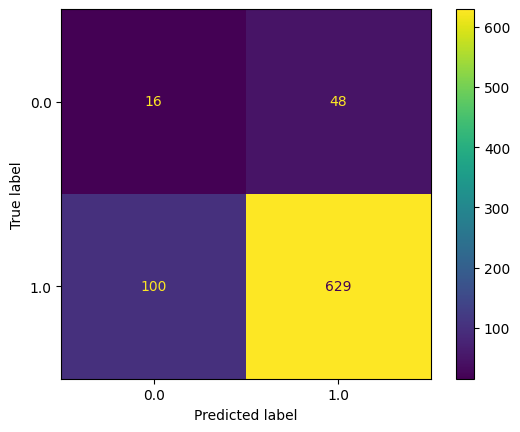

In [13]:
metrics.ConfusionMatrixDisplay.from_predictions(test_y, test_predictions)

In [14]:
metrics.f1_score(1-test_y, 1-test_predictions)

0.17777777777777778